In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [15]:
circ = makeCirc(6, 0)
#getBloch(circ)

011010


In [16]:
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

for i in range(2, 6):
    circ.measure(i, i)

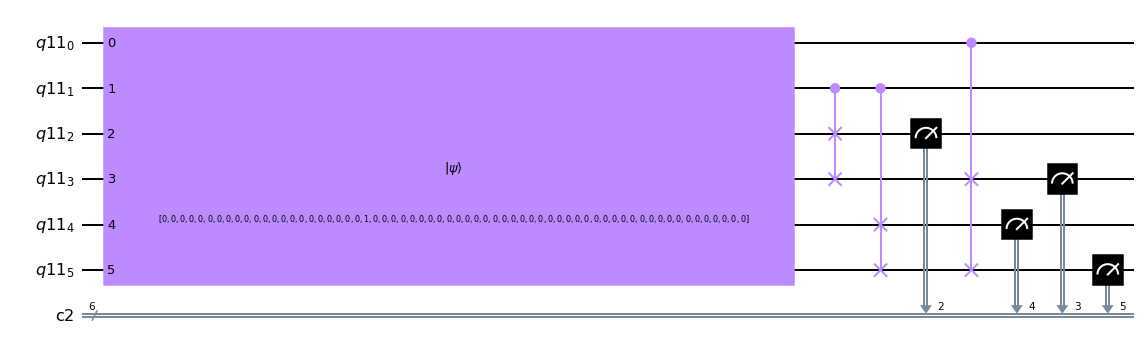

In [17]:
circ.draw('mpl')

In [18]:
getMeasure(circ, 1)[0][::-1]

'000101'

In [20]:
circ = QuantumCircuit(6)
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

In [22]:
mux = circ.to_gate(label=' Mux')

In [23]:
circ2 = QuantumCircuit(12)
circ2.append(mux, [0, 1, 2, 3, 4, 5])

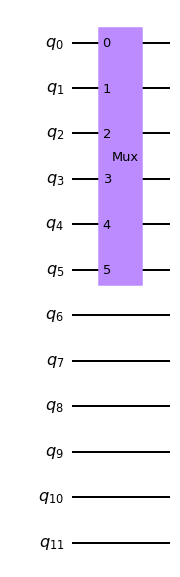

In [24]:
circ2.draw('mpl')

In [25]:
circ3 = QuantumCircuit(6)
circ3.cswap(1, 2, 3)
circ3.cswap(0, 2, 4)
circ3.cswap(0, 3, 5)

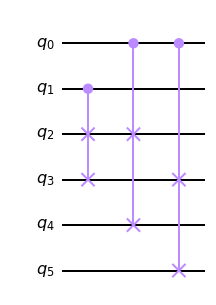

In [26]:
circ3.draw('mpl')

In [27]:
demux = circ3.to_gate(label=' Demux')

In [28]:
circ2.append(demux, [6, 7, 8, 9, 10, 11])

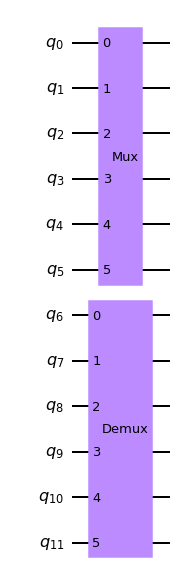

In [29]:
circ2.draw('mpl')